# Object Detection

# Imports libraries

In [8]:
import numpy as np
import datetime
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import winsound
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
#from utils import label_map_util
#from utils import visualization_utils as vis_util
#import Database_connection as dbc
from urllib.request import urlopen
from PIL import Image

#if tf.__version__ < '1.4.0':
#    raise ImportError('tensorflow installation to v1.4.* or later!')
print('import done')

import done


   ## Env setup

In [9]:
%matplotlib inline
sys.path.append("..")

# Model preparation 

## Variables

In [24]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = "C:/tensorflow1/object_detection/faster_rcnn_inception_v2_coco_2018_01_28" + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'C:/tensorflow1/object_detection/data/mscoco_label_map.pbtxt'
print(PATH_TO_LABELS)

NUM_CLASSES = 23

C:/tensorflow1/object_detection/data/mscoco_label_map.pbtxt


## Load a (frozen) Tensorflow model into memory.

In [25]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Loading label map

In [32]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 17: {'id': 17, 'name': 'monkey'}}


## Helper code

In [41]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [42]:
#PATH_TO_TEST_IMAGES_DIR = r'C:\tensorflow1\models\research\object_detection\test_images'
#TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1,2) ]

#image_path=r'C:\tensorflow1\models\research\object_detection\test_images\image1.jpg'
# Size, in inches, of the output images.


In [43]:
PATH_TO_TEST_IMAGES_DIR = r'C:\tensorflow1\object_detection\test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1,2) ]
IMAGE_SIZE = (12, 8)
# Size, in inches, of the output images.

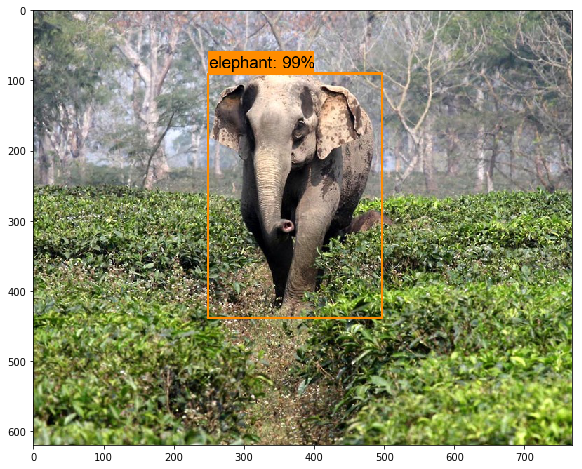

In [46]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
          image=Image.open(image_path)
          image_np = load_image_into_numpy_array(image)
          image_np_expanded = np.expand_dims(image_np, axis=0)
          # Actual detection.\
          (boxes, scores, classes, num) = sess.run(
            [detection_boxes, detection_scores, detection_classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})
          # Visualization of the results of a detection.
          if np.squeeze(classes).astype(np.int32)[0] in [19,20,22,21,23,17,18] or np.squeeze(classes).astype(np.int32)[1] in [19,20,22,21,23,17,18]:
              vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                min_score_thresh=.9,
                use_normalized_coordinates=True,
                line_thickness=3)
          plt.figure(figsize=IMAGE_SIZE)
          plt.imshow(image_np)
          A=[category_index.get(value)for index,value in enumerate(classes[0]) if scores[0,index] > 0.9]
          try:
              if A[0] is not None and A[0]['name'] in ['cow','elephant','monkey','sheep','bear','horse']:
                  frequency = 2500  # Set Frequency To 2500 Hertz
                  duration = 1000  # Set Duration To 1000 ms == 1 second
                  winsound.Beep(frequency, duration)
          except AttributeError:
              pass

In [36]:
while True:
    #result=dbc.read()
    if result is not None:
        url=result[0].lstrip()
        id=result[1]
        img = Image.open(urlopen(url))
        status=result[2]
        print(status)
        IMAGE_SIZE = (12, 8)
        if status==0:
            print("enter")
            with detection_graph.as_default():
                with tf.Session(graph=detection_graph) as sess:
                    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
                    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
                    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
                    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
                    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
                    #for image_path in TEST_IMAGE_PATHS:
                    image = img
                    image_np = load_image_into_numpy_array(image)
                    image_np_expanded = np.expand_dims(image_np, axis=0)
                    # Actual detection.\
                    (boxes, scores, classes, num) = sess.run(
                      [detection_boxes, detection_scores, detection_classes, num_detections],
                      feed_dict={image_tensor: image_np_expanded})
                    # Visualization of the results of a detection.
                    if np.squeeze(classes).astype(np.int32)[0] in [19,20,22,21,23,17,18] or np.squeeze(classes).astype(np.int32)[1] in [19,20,22,21,23,17,18]:
                        vis_util.visualize_boxes_and_labels_on_image_array(
                          image_np,
                          np.squeeze(boxes),
                          np.squeeze(classes).astype(np.int32),
                          np.squeeze(scores),
                          category_index,
                          min_score_thresh=.9,
                          use_normalized_coordinates=True,
                          line_thickness=3)
                    plt.figure(figsize=IMAGE_SIZE)
                    plt.imshow(image_np)
                    x=datetime.datetime.now()
                    img_name="result"+str(x.strftime("%Y%m%d%H%M%S"))+".jpeg"
                    local_path="C:/tensorflow1/models/research/object_detection/output_image"+img_name
                    plt.savefig(local_path)
                    dbc.upload(local_path,id,img_name)
                    A=[category_index.get(value)for index,value in enumerate(classes[0]) if scores[0,index] > 0.9]
                    try:
                        if A[0] is not None and A[0]['name'] in ['cow','elephant','monkey','sheep','bear','horse']:
                            frequency = 2500  # Set Frequency To 2500 Hertz
                            duration = 1000  # Set Duration To 1000 ms == 1 second
                            #winsound.Beep(frequency, duration)
                    except AttributeError:
                        pass
    else:
        print("No Image Found")

NameError: name 'result' is not defined